# Analisis de audio con Python

El analisis de datos de audio se trata de analizar y comprender señales 
de audio o datos de voz. La exploracion de los sistemas de reconocimiento son estudiados desde 1950 y han evolucionado a traves de las decadas.

* 1952: El primer sistema de reconocimiento de voz fue Audrey, desarrollada por los laboratorios Bell, este sistema solo reconocia digitos

* 1962: IBM Shoebox, era capaz de reconocer 16 palabras inluyendo digitos

* 1970: DARPA fundo un programa de 5 años llamado 'Speech Understanding Research' del cual se creo Harpy que podia reconocer 1011 palabras

* 1980: El modelo HMM (Hidden Markov Model) es aplicado a los sistemas reconocimiento de voz

* 2001: Google introduce 'Voice Search' que le permitia a los usuarios realizar busquedas por voz

* 2011: Apple lanza Siri un sistema en tiempo real para interactuar con sus dispositivos



## Herramientas de procesamiento de lenguaje natural

* NLTK: Es un kit de herramientas open-source para procesado simbolico y estadistico de lenguaje en ingles desarrollado por la universidaad de Pennsylvania.

* Gensim: kit de herramientas basado en Python para documentos de texto.

* spaCy: Herramienta de alto desempeño basado en Python desarrollado por Explosion AI.

* AllenNLP: Libreria de investigacion construida con PyTorch.

## Marcos de trabajo

* Sphinx: Herramienta ASR desarrollada por Carnegie Mellon enfocada a  produccion y desarrollo de aplicaciones.

* ESPnet: Marco ASR inspirado en Kaldi y escrito con PyTorch.

## Procesamiento de audio

* LibROSA: Paquete Python para analisis de audio, comunmente usado para  extraccion de caracteristicas y procesamiento digital.
* https://librosa.org/
* https://librosa.org/doc/latest/index.html
* https://github.com/librosa

* SpeechRecognition: Libreria para realizar reconocimiento de dialogo con soporte para varios motores y APIs online y offline
* https://github.com/Uberi/speech_recognition#readme
* https://pypi.org/project/SpeechRecognition/

## Casos de uso y detalles de implementacion

* Similaridad de texto
* Clasificacion de texto
* Extraccion de entidades
* Extraccion de relaciones
* Etiquetado semantico
* Traduccion automatica
* Resumen de textos
* Responder preguntas
* Reconocer dialogos

## Importamos librerias

In [1]:
import os
import pandas as pd
import librosa
import librosa.display
import speech_recognition as sr
import IPython.display as ipd
import numpy as np
from scipy.io import wavfile

import matplotlib.pyplot as plt
%matplotlib inline

## Versiones de librerias

In [2]:
print('Version de pandas : ', pd.__version__)
print('Version de numpy : ', np.__version__)
print('Version de librosa : ', librosa.__version__)
print('Version de speech recognition : ', sr.__version__)

Version de pandas :  1.0.5
Version de numpy :  1.18.2
Version de librosa :  0.8.0
Version de speech recognition :  3.8.1


## Ejemplo para transcribir dialogos cortos con SpeechRecognition

In [3]:
r = sr.Recognizer()

archivo = sr.AudioFile('Audios/audio1.wav')

with archivo as source:
    audio1 = r.record(source)
    
    try:
        texto = r.recognize_google(audio1, language='es-ES')
        print(texto)
        
    except sr.UnknownValueError:
        print('No fue posible identificar el audio, intente de nuevo')
        
    except sr.RequestError as error: 
        print('No fue posible consultar en el servicio de reconocimiento de Google; {0}'.format(error)) 

y al día siguiente llega ella con una fotografía de su familia


## Ejemplo con Librosa para exploracion de datos

In [4]:
ruta = 'Audios/audio2.wav'

In [5]:
audio2, sr = librosa.load(ruta)

In [6]:
ipd.Audio(ruta)

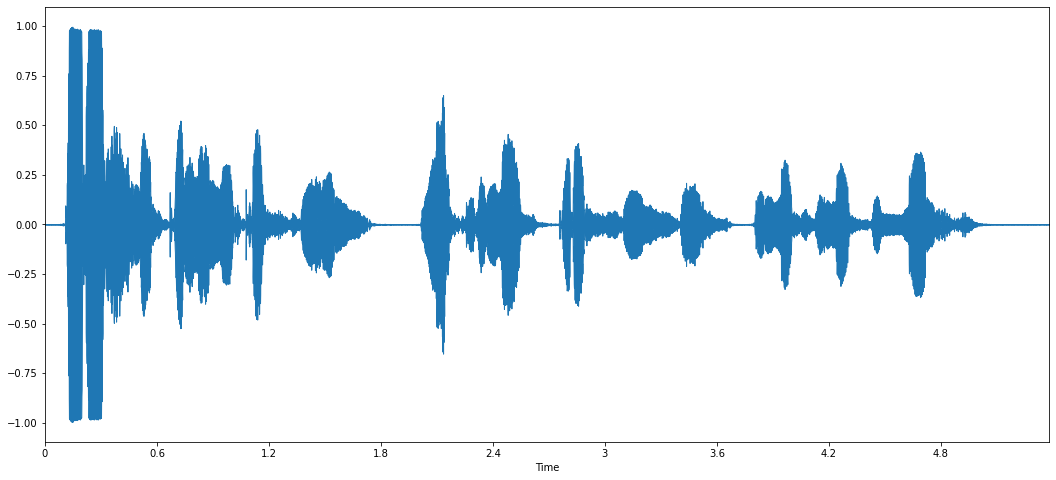

In [7]:
plt.figure(figsize=(18, 8))
librosa.display.waveplot(audio2)

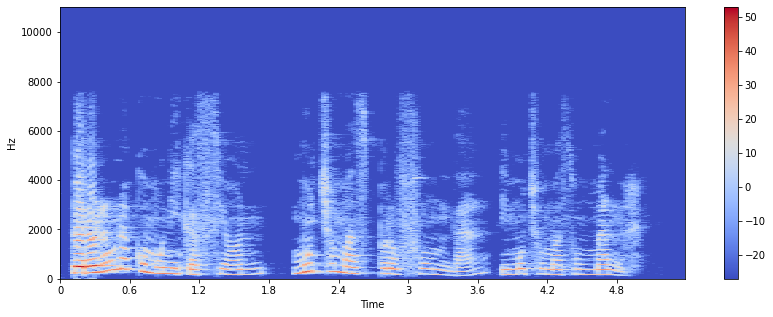

In [8]:
X = librosa.stft(audio2.astype('float')) #Short term Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

## Extraccion de caracteristicas con Librosa

El audio no puede ser entendido por un modelo directamente, requiere ser convertido en un formato entendible, la extraccion de caracteristicas es inevitable en el caso de los audios para analisis y clasificacion.

## Mel Frequency Cepstral Coefficients (MFCCs)

Los coeficientes cepstrales de frecuencia mel (MFCC) de una señal son un pequeño conjunto de características (generalmente alrededor de 10-20) que describen de manera concisa la forma general de una envolvente espectral. En MIR, a menudo se usa para describir el timbre.

In [9]:
mfccs = librosa.feature.mfcc(y=audio2)
mfccs.shape

(20, 232)

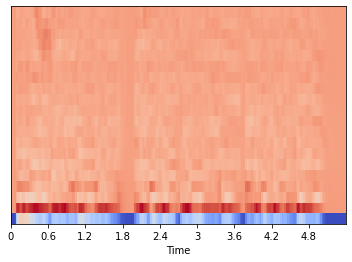

In [10]:
librosa.display.specshow(mfccs, x_axis='time')

## Zero Crossing Rate

La tasa de cruce por cero indica el número de veces que una señal cruza el eje horizontal. Acerquemos y simplifiquemos la onda para que podamos calcular la tasa de cruce por cero manualmente y verificar.

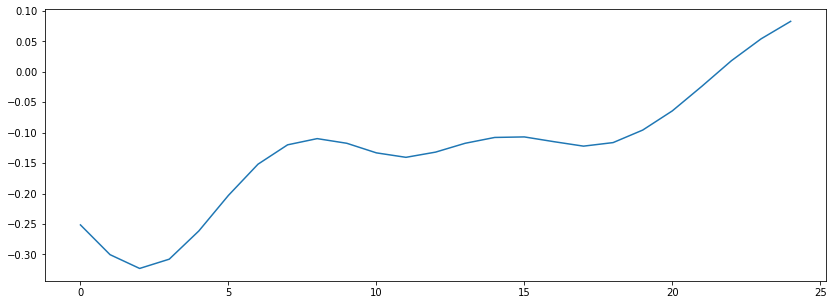

In [11]:
n0 = 7000
n1 = 7025
plt.figure(figsize=(14, 5))
plt.plot(audio2[n0:n1])

In [12]:
zero_crossings = librosa.zero_crossings(audio2[n0:n1], pad=False)

In [13]:
zero_crossings.shape

(25,)

In [14]:
zero_crossings.sum()

1

Esto da el zero_crossings. Podemos verificar esto manualmente desde la propia trama. Claramente hay 1 cruce por cero en la trama. Ahora podemos usar todo el audio para revisar esto y deducir los cruces por cero de todos los datos.

In [15]:
zcrs = librosa.feature.zero_crossing_rate(audio2)
print(zcrs.shape)

(1, 232)


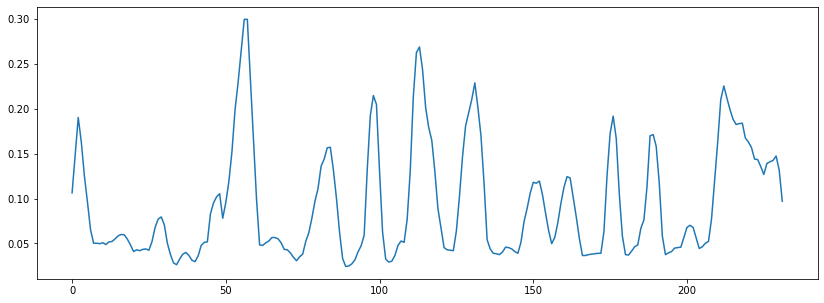

In [16]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

## Spectral Centroid

El centroide espectral (Wikipedia) indica en qué frecuencia se centra la energía de un espectro. Esto es como una media ponderada:

fc=∑kS(k)f(k)∑kS(k)

donde S (k) es la magnitud espectral en el intervalo de frecuencia k, f (k) es la frecuencia en el intervalo k.

In [17]:
spectral_centroids = librosa.feature.spectral_centroid(audio2)[0]
spectral_centroids.shape

(232,)

In [18]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [19]:
import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

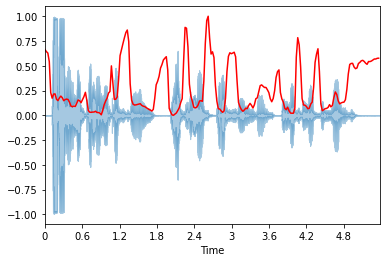

In [20]:
librosa.display.waveplot(audio2, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Spectral Bandwidth

ancho de banda espectral: m

(∑kS(k)(f(k)−fc)p)1p

donde S (k) es la magnitud espectral en el intervalo de frecuencia k, f (k) es la frecuencia en el intervalo k y fc es el centroide espectral. Cuando p = 2, esto es como una desviación estándar ponderada.

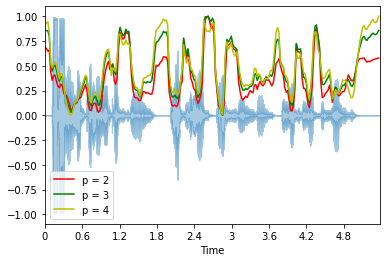

In [21]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(audio2+0.01)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(audio2+0.01, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(audio2+0.01, p=4)[0]
librosa.display.waveplot(audio2, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## Spectral-roll off

La caída espectral es la frecuencia por debajo de la cual se encuentra un porcentaje específico de la energía espectral total

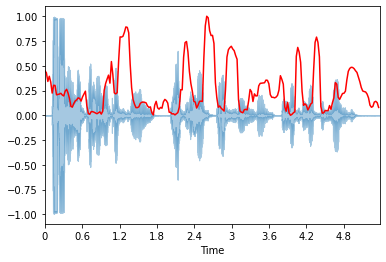

In [22]:
spectral_rolloff = librosa.feature.spectral_rolloff(audio2+0.01)[0]
librosa.display.waveplot(audio2, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Chroma Feature

Un vector de croma (Wikipedia) (FMP, p. 123) es típicamente un vector de características de 12 elementos que indica cuánta energía de cada clase de tono, {C, C #, D, D #, E, ..., B}, es presente en la señal.

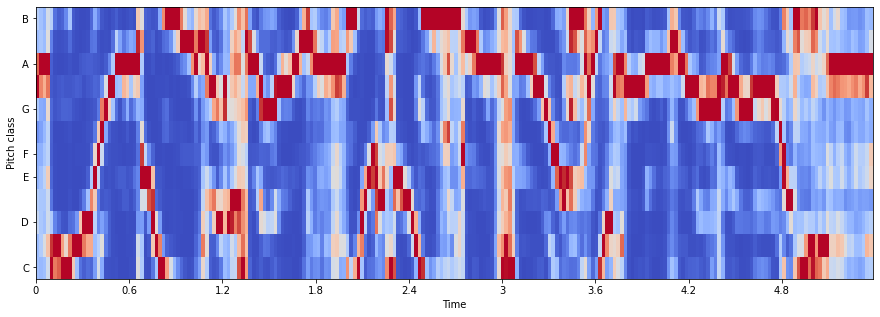

In [23]:
chromagram = librosa.feature.chroma_stft(audio2, hop_length=512)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

## Pitches and Magnitudes

El tono es una propiedad perceptiva de los sonidos que permite su ordenación en una escala relacionada con la frecuencia, o más comúnmente, el tono es la cualidad que hace posible juzgar los sonidos como "más altos" y "más bajos" en el sentido asociado con las melodías musicales.

In [24]:
pitches, magnitudes = librosa.piptrack(y=audio2)
print(pitches)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
print(magnitudes)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Estas son algunas de las funciones que se pueden utilizar para la clasificación de datos de audio. Esto podría ayudar no solo en este conjunto de datos. Es aplicable en casi cualquier procesamiento de audio.